In [53]:
####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import yaml
import pickle
import joblib
import os
import src.utils as utils
import importlib
importlib.reload(utils)

## load configuration file
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
root_path = os.getcwd()

In [2]:
## load constant variables
TARGET_COL = config['data_source']['target_col']
TEST_SZ = config['data_source']['test_size']
SEED_ST = config['data_source']['random_state']
NUM_COLS = config['data_source']['num_cols']
CAT_COLS = config['data_source']['cat_cols']
CORR_COLS = config['data_source']['corr_cols']

## data
X_TRAIN_PATH = config['processed_files']['X_train']
X_TEST_PATH = config['processed_files']['X_test']
X_VALID_PATH = config['processed_files']['X_valid']
y_TRAIN_PATH = config['processed_files']['y_train']
y_TEST_PATH = config['processed_files']['y_test']
y_VALID_PATH = config['processed_files']['y_valid']

## Desirialize Pickle Data
var_name = ["X_train_prep", "X_test_prep", "X_valid_prep", "y_train_prep", "y_test_prep", "y_valid_prep"]
stock_list = [X_TRAIN_PATH, X_TEST_PATH, X_VALID_PATH, y_TRAIN_PATH, y_TEST_PATH, y_VALID_PATH]
for var_name, path in zip(var_name, stock_list):
    globals()[var_name] = utils.deserialize_data(path)

In [3]:
### testing
X_train_prep

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_onfile_N,default_onfile_Y
29762,45,37500,1.0,5000,11.49,0.13,16,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2714,25,50000,5.0,12000,7.88,0.24,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50,24,78000,4.0,30000,10.99,0.38,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
28458,31,78504,2.0,10000,11.41,0.13,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3674,26,14000,2.0,4000,10.99,0.29,3,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7647,22,47000,3.0,6850,10.65,0.15,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1120,22,40000,1.0,17000,10.65,0.42,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19531,27,34000,12.0,10625,13.47,0.31,10,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5581,26,74500,8.0,5000,11.36,0.07,2,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
ros = RandomOverSampler(random_state=SEED_ST)

Text(0.5, 1.0, 'plot of class balance, Ratio default - non default : 0.28')

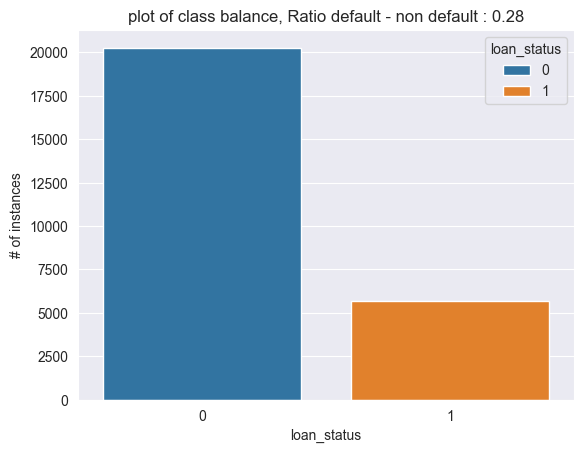

In [44]:
y_train_df = pd.DataFrame(y_train_prep)
target_counts = y_train_df.value_counts()
## plot label
sns.countplot(y_train_df, x="loan_status", hue="loan_status")
target_dict = {}


for i, count in zip(target_counts.index, target_counts.values):
    count = int(count) ; i = str(i)[1]
    target_dict[i] = count

cls_ratio = round(target_dict["1"] / target_dict["0"], 2)
plt.ylabel("# of instances")
plt.title(f"plot of class balance, Ratio default - non default : {round(target_dict['1'] / target_dict['0'],2)}")

In [50]:
X_train_prep = X_train_prep.reset_index(drop=True)
y_train_prep = y_train_prep.reset_index(drop=True)

In [51]:
X_train_ros , y_train_ros = ros.fit_resample(X_train_prep, y_train_prep)

Text(0.5, 1.0, 'plot of class balance, Ratio default - non default : 1.0')

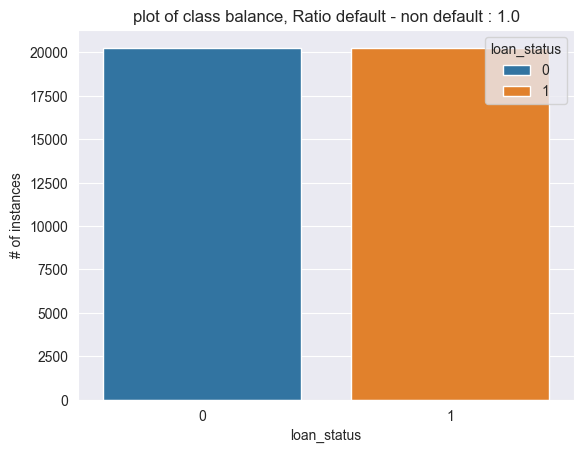

In [52]:
y_train_ros_df = pd.DataFrame(y_train_ros)
target_counts_ros = y_train_ros_df.value_counts()
## plot label
sns.countplot(y_train_ros_df, x="loan_status", hue="loan_status")
target_dict_ros = {}


for i, count in zip(target_counts_ros.index, target_counts_ros.values):
    count = int(count) ; i = str(i)[1]
    target_dict[i] = count

cls_ratio_ros = round(target_dict["1"] / target_dict["0"], 2)
plt.ylabel("# of instances")
plt.title(f"plot of class balance, Ratio default - non default : {cls_ratio_ros}")

In [55]:
utils.serialize_data(X_train_ros, config["ROS_file"]["X_train"])
utils.serialize_data(y_train_ros, config["ROS_file"]["y_train"])